# Tutorial 2, Example 1b

In [1]:
import torch
import numpy as np
import matplotlib.pylab as plt

## Set the parameters

In [2]:
no_epochs = 200
lr = 0.01

SEED = 10
np.random.seed(SEED)

## Read training data and Initialize weights and biases

In [3]:
# generate training data
X = np.array([[0.09, -0.44, -0.15],
              [0.69, -0.99, -0.76],
              [0.34, 0.65, -0.73],
              [0.15, 0.78, -0.58],
              [-0.63, -0.78, -0.56],
              [0.96, 0.62, -0.66],
              [0.63, -0.45, -0.14],
              [0.88, 0.64, -0.33]])
Y = np.array([-2.57, -2.97, 0.96, 1.04, -3.21, 1.05, -2.39, 0.66]).reshape(8,1)

# initialize weights and biases
w = np.array([0.77, 0.02, 0.63]).reshape(3,1)
b = 0.0

In [4]:
# class for a linear neuron
class Linear():
  def __init__(self):
    self.w = torch.tensor(w, dtype=torch.double)
    self.b = torch.tensor(b, dtype=torch.double)

  def __call__(self, x):
    return torch.matmul(torch.tensor(x) ,self.w) + self.b

In [5]:
# squared error as the loss function
def loss(predicted_y, target_y):
  return torch.mean(torch.square(predicted_y - torch.tensor(target_y)))

In [6]:
def train(model, x, d, learning_rate):
    y = model(x)
    grad_w = -torch.matmul(torch.transpose(torch.tensor(x), 0, 1), (torch.tensor(d) - y))
    grad_b = -torch.sum((torch.tensor(d) - y))

    model.w -= learning_rate * grad_w
    model.b -= learning_rate * grad_b

In [7]:
# create a linear neuron
model = Linear()
print('w: {}, b: {}'.format(model.w.numpy(), model.b.numpy()))

w: [[0.77]
 [0.02]
 [0.63]], b: 0.0


## Training begins 

In [8]:
# Collect the history of W-values and b-values to plot later
mse = []
for epoch in range(no_epochs):
    
    y_ = model(X)
    loss_ = loss(y_, Y)
  
    train(model, X, Y, learning_rate=lr)

    mse.append(loss_)
  
    if epoch < 2:
        print('epoch: {}'.format(epoch+1))
        print('y: {}'.format(y_))
        print('mse: {}'.format(loss_))
        print('w: %s, b: %s'%(model.w.numpy(), model.b.numpy()))

    if epoch%10 == 9:
        print('epoch: {}, mse: {}'.format(epoch+1, loss_))

epoch: 1
y: tensor([[-0.0340],
        [ 0.0327],
        [-0.1851],
        [-0.2343],
        [-0.8535],
        [ 0.3358],
        [ 0.3879],
        [ 0.4825]], dtype=torch.float64)
mse: 4.0242507925
w: [[0.75856726]
 [0.11471311]
 [0.65266034]], b: -0.07362
epoch: 2
y: tensor([[-0.1537],
        [-0.1598],
        [-0.2176],
        [-0.2489],
        [-1.0065],
        [ 0.2950],
        [ 0.2613],
        [ 0.4520]], dtype=torch.float64)
mse: 3.660220398173507
w: [[0.74919747]
 [0.20600435]
 [0.67195206]], b: -0.14013723642499998
epoch: 10, mse: 1.8818245263383104
epoch: 20, mse: 0.9495712683282156
epoch: 30, mse: 0.5425509594027775
epoch: 40, mse: 0.35110968525051284
epoch: 50, mse: 0.2547767712900638
epoch: 60, mse: 0.20190259259073734
epoch: 70, mse: 0.16968403979613988
epoch: 80, mse: 0.14785264369737552
epoch: 90, mse: 0.13166028481517764
epoch: 100, mse: 0.11882155329065121
epoch: 110, mse: 0.10817116721029714
epoch: 120, mse: 0.09906906315175976
epoch: 130, mse: 0.0911329

## Print final weights, biases and error

In [9]:
print('w: {}, b: {}'.format(model.w.numpy(), model.b.numpy()))
print('mse: %g'%mse[-1])

w: [[ 0.36834519]
 [ 2.56679646]
 [-0.20822191]], b: -1.1642720630787955
mse: 0.0541696


## Plot learning curves

Text(0, 0.5, 'mean square error')

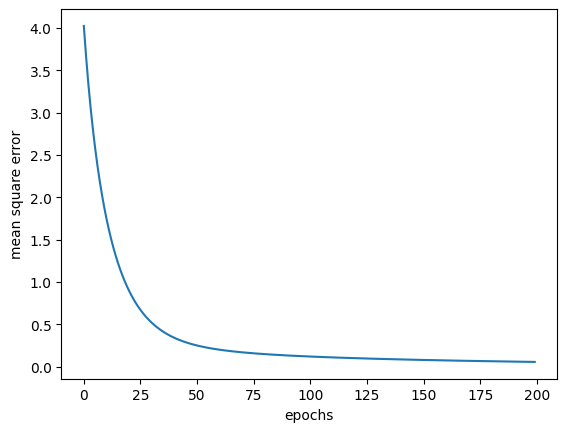

In [10]:
# plot learning curve
plt.figure(1)
plt.plot(range(no_epochs), mse)
plt.xlabel('epochs')
plt.ylabel('mean square error')

In [11]:
# print predictions
for p in np.arange(len(X)):
    y_ = model(X[[p]])
    print('x: %s, d: %g, y: %g'%(X[p], Y[p], y_))

x: [ 0.09 -0.44 -0.15], d: -2.57, y: -2.22928
x: [ 0.69 -0.99 -0.76], d: -2.97, y: -3.29299
x: [ 0.34  0.65 -0.73], d: 0.96, y: 0.781385
x: [ 0.15  0.78 -0.58], d: 1.04, y: 1.01385
x: [-0.63 -0.78 -0.56], d: -3.21, y: -3.28183
x: [ 0.96  0.62 -0.66], d: 1.05, y: 0.91818
x: [ 0.63 -0.45 -0.14], d: -2.39, y: -2.05812
x: [ 0.88  0.64 -0.33], d: 0.66, y: 0.871335


C:\Users\snorl\AppData\Local\Temp\ipykernel_4184\1553503503.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('x: %s, d: %g, y: %g'%(X[p], Y[p], y_))


## Practice - Model Construction

In [5]:
import torch 
import numpy as np
import matplotlib.pyplot as plt

no_epochs = 200
lr = 0.01
SEED = 10
np.random.seed(SEED)

X = np.array([[0.09, -0.44, -0.15],
              [0.69, -0.99, -0.76],
              [0.34, 0.65, -0.73],
              [0.15, 0.78, -0.58],
              [-0.63, -0.78, -0.56],
              [0.96, 0.62, -0.66],
              [0.63, -0.45, -0.14],
              [0.88, 0.64, -0.33]])
Y = np.array([-2.57, -2.97, 0.96, 1.04, -3.21, 1.05, -2.39, 0.66]).reshape(8,1)
w = np.array([0.77, 0.02, 0.63]).reshape(3,1)
b = 0.0

class Linear():
    def __init__(self):
        self.w = torch.tensor(w, dtype=torch.double)
        self.b = torch.tensor(b, dtype=torch.double)
    def __call__(self, x):
        return torch.matmul(torch.tensor(x), self.w) + self.b

def loss(pred_y, actual_y):
    return torch.mean(torch.square(pred_y - torch.tensor(actual_y)))

def train(model, X, Y, lr):
    pred_y = model(X)
    grad_w = - torch.matmul(torch.transpose(torch.tensor(X), 0, 1), (torch.tensor(Y) - pred_y))
    grad_b = - torch.sum(torch.tensor(Y) - pred_y)
    model.w -= lr * grad_w
    model.b -= lr* grad_b

model = Linear()
print('w: {}, b: {}'.format(model.w.numpy(), model.b.numpy()))

w: [[0.77]
 [0.02]
 [0.63]], b: 0.0


In [6]:
mse = []

for i in range(no_epochs):
    pred_y = model(X)
    mse.append(loss(pred_y, Y))

    train(model, X, Y, lr)

print('w: {}, b: {}'.format(model.w.numpy(), model.b.numpy()))
print('mse: %g'%mse[-1])

w: [[ 0.36834519]
 [ 2.56679646]
 [-0.20822191]], b: -1.1642720630787955
mse: 0.0541696


Text(0, 0.5, 'mean square error')

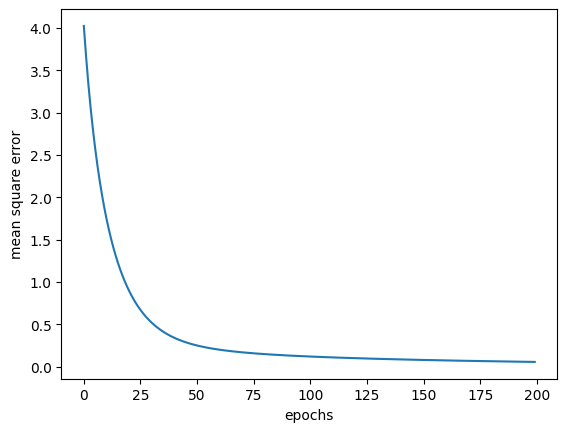

In [7]:
plt.figure(1)
plt.plot(range(no_epochs), mse)
plt.xlabel('epochs')
plt.ylabel('mean square error')

In [8]:
for p in np.arange(len(X)):
    y_ = model(X[[p]])
    print('x: %s, d: %g, y: %g'%(X[p], Y[p], y_))

x: [ 0.09 -0.44 -0.15], d: -2.57, y: -2.22928
x: [ 0.69 -0.99 -0.76], d: -2.97, y: -3.29299
x: [ 0.34  0.65 -0.73], d: 0.96, y: 0.781385
x: [ 0.15  0.78 -0.58], d: 1.04, y: 1.01385
x: [-0.63 -0.78 -0.56], d: -3.21, y: -3.28183
x: [ 0.96  0.62 -0.66], d: 1.05, y: 0.91818
x: [ 0.63 -0.45 -0.14], d: -2.39, y: -2.05812
x: [ 0.88  0.64 -0.33], d: 0.66, y: 0.871335


C:\Users\snorl\AppData\Local\Temp\ipykernel_15432\3237935187.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('x: %s, d: %g, y: %g'%(X[p], Y[p], y_))
